In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fname = 'LIFE223-202324/LIFE223.1._moderation_report.xlsx'
df = pd.read_excel(fname)



In [3]:
# Add colum "moderate" to df. Default is False
df['moderate'] = False

# Add column "moderate_reason" to df. Default is empty string
df['moderate_reason'] = ''
df['rubric_score_diff'] = 0

In [4]:
df = df[df['status'] == 'graded']

In [5]:
# Convert column to string
df['comments'] = df['comments'].astype(str)

# Determine distribution of word counts in comments column
word_counts = df['comments'].str.split().apply(len)

df["comment_word_count"] = word_counts

In [6]:
# For each row in df, if the value in word_count column is more than 1 standard deviation below the mean, set moderate to True
df.loc[word_counts < word_counts.mean() - word_counts.std(), 'moderate'] = True

# And set the moderate_reason to "Comment word count is more than 1 standard deviation below the mean"
df.loc[word_counts < word_counts.mean() - word_counts.std(), 'moderate_reason'] += "Comment word count is more than 1 standard deviation below the mean, "

In [7]:
df.head()

,last_name,first_name,sis_user_id,submitted_at,seconds_late,status,posted_at,score,grader,comments,...,SCORE_Synthesis and Evaluation,SCORE_Structure,SCORE_Use of Supplementary Material,SCORE_Language,SCORE_Presentation and Layout,SCORE_Academic Integrity,moderate,moderate_reason,rubric_score_diff,comment_word_count
0,Campbell,David,201502209psdcamp2,2023-10-16T21:30:22Z,282622,graded,2023-10-24T08:37:26Z,52.00,"Perez-Mancera, Pedro",David has written a very good essay. The cover...,...,9.75,6.5,12.00,3.25,3.25,0.0,False,,0,65
1,Cleary,Jack,201318725hljclear,2023-10-12T21:35:40Z,0,graded,2023-10-24T08:37:26Z,66.25,"Swan, Laura",well done: you've chosen some nice arguments t...,...,9.75,5.5,12.00,3.25,3.25,0.0,False,,0,105
2,Gawthorpe,Anson,201427536psagawth,2023-10-12T16:11:02Z,0,graded,2023-10-24T08:37:26Z,63.00,"Hartwell, James",This was a good to very good essay for the mos...,...,9.75,6.5,9.75,3.25,3.25,0.0,False,,0,168
3,Harrison,Emilie,201315454pseharr4,NaN,12706810,graded,2023-10-24T08:37:26Z,62.25,"Wattret, Gemma",Essay Mark carried from 21/22 (62.25%),...,NaN,NaN,NaN,NaN,NaN,NaN,True,Comment word count is more than 1 standard dev...,0,6
5,Mallett,Charlotte,201393620hlcmalle,2023-10-12T16:52:58Z,0,graded,2023-10-24T08:37:26Z,62.25,"Zytynska, Sharon","The main points are introduced here, but in mo...",...,8.25,8.0,9.75,2.75,4.00,0.0,False,,0,69


In [10]:
# Group by grader and tabulate average grader score and standard devation in grader score. Order by score in descending order
grader_scores = df.groupby('grader')['score'].agg(['mean', 'std']).sort_values('mean', ascending=False)



In [12]:
# rename "mean" as "score"
grader_scores.rename(columns={'mean': 'score'}, inplace=True)

In [14]:
# Ignore zeroes
grader_scores = grader_scores[grader_scores['score'] > 0]

# Find all graders with average score below 1 standard deviation from the mean
grader_scores_below_sd = grader_scores[grader_scores['score'] < df["score"].mean() - df['score'].std()]

grader_scores_above_sd = grader_scores[grader_scores['score'] > df["score"].mean() + df['score'].std()]

: 

In [133]:
# For every grader in grader_scores, set moderate to True and moderate_reason to "Grader average score is more than 1 standard deviation below the mean"
for grader in grader_scores_below_sd.index:
    df.loc[df['grader'] == grader, 'moderate'] = True
    df.loc[df['grader'] == grader, 'moderate_reason'] += "Grader average score is more than 1 standard deviation below the mean, "

In [134]:
# For every grader in grader_scores, set moderate to True and moderate_reason to "Grader average score is more than 1 standard deviation below the mean"
for grader in grader_scores_above_sd.index:
    df.loc[df['grader'] == grader, 'moderate'] = True
    df.loc[df['grader'] == grader, 'moderate_reason'] += "Grader average score is more than 1 standard deviation above the mean,"

In [135]:
# for all df, total values for each row in columns containing word "SCORE". 
# If total is more than value in "score" column, set moderate to True and moderate_reason to "Final score is different to rubric total"
df.loc[df.filter(like='SCORE').sum(axis=1) != df['score'], 'moderate'] = True

df.loc[df.filter(like='SCORE').sum(axis=1) != df['score'], 'moderate_reason'] += "Final score is different to rubric total, "

df.loc[df.filter(like='SCORE').sum(axis=1) != df['score'], 'rubric_score_diff'] = df.filter(like='SCORE').sum(axis=1) - df['score']

C:\Users\treharne\AppData\Local\Temp\ipykernel_13468\3611313763.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 19.75 -62.25 -65.   -69.5  -10.   -67.5   -1.5  -26.     5.   -29.
   5.     5.   -62.5   30.     1.5   10.     5.    10.   -49.   -68.
 -55.75  -1.5  -29.5  -59.    14.   -36.5   -1.5  -52.5    1.25  58.
  -0.5    3.25 -58.   -32.    -0.5  -29.5    5.   -28.   -20.5  -36.
 -76.   -22.5  -12.5   68.    -4.    -3.     5.   -18.5  -68.     5.
 -51.    10.   -28.   -48.   -30.   -27.75  -1.75  -1.   -56.    -0.5
   3.5    5.   -15.   -52.    -0.25 -21.   -33.    -3.    -0.5  -17.
  -3.5  -23.     5.    15.     3.5  -56.75  -1.   -14.    10.   -14.
 -14.   -45.5  -12.5  -56.     5.   -55.    -9.     5.   -11.   -36.5
  -1.   -56.   -21.     5.     8.     3.5   -0.5  -29.   -57.    -1.
 -58.5   -2.5  -54.75 -26.5   -3.     5.     5.     5.   -17.5    0.25]' has dtype incompatible with int64, please expli

In [137]:
df.to_excel('moderated.xlsx', index=False)

(0.0, 200.0)

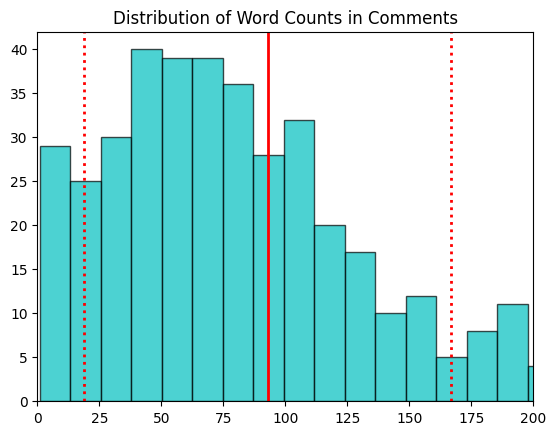

In [26]:
# Plot historgram or word_counts.
# Include vertical red line for mean word count.
# Include dotted vertical lines for 1 and 2 standard deviations from the mean.

plt.hist(word_counts, bins=50, color='c', edgecolor='k', alpha=0.7)
plt.axvline(word_counts.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(word_counts.mean() + word_counts.std(), color='r', linestyle='dotted', linewidth=2)
plt.axvline(word_counts.mean() - word_counts.std(), color='r', linestyle='dotted', linewidth=2)
plt.axvline(word_counts.mean() + 2*word_counts.std(), color='r', linestyle='dotted', linewidth=2)
plt.axvline(word_counts.mean() - 2*word_counts.std(), color='r', linestyle='dotted', linewidth=2)
plt.title('Distribution of Word Counts in Comments')

# Set x range 0 - 200
plt.xlim(0, 200)

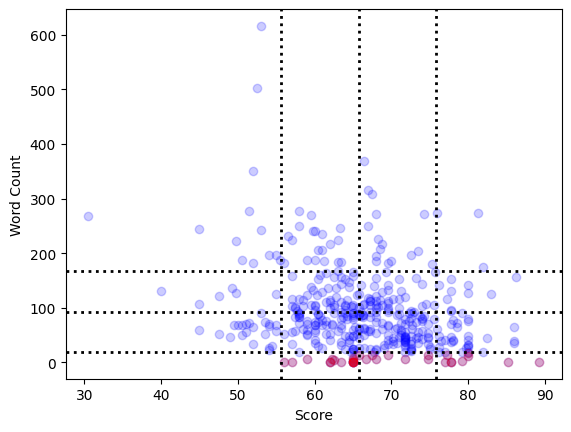

In [36]:
# Scatterplot of word_couts vs score. Ignore zero scores
plt.scatter(df['score'][df['score'] > 0], word_counts[df['score'] > 0], color='b', alpha=0.2)

# Color points that have word_count above or below 1 standard devation from mean
plt.scatter(df['score'][word_counts < word_counts.mean() - word_counts.std()], word_counts[word_counts < word_counts.mean() - word_counts.std()], color='r', alpha=0.2)
plt.xlabel('Score')

# Label y-axis
plt.ylabel('Word Count')

# Include dotted black vertical line for mean score
plt.axvline(df['score'].mean(), color='k', linestyle='dotted', linewidth=2)

# Include light grey horizontal lines for 1 standard deviation from the mean score
plt.axvline(df['score'].mean() + df['score'].std(), color='k', linestyle='dotted', linewidth=2)
plt.axvline(df['score'].mean() - df['score'].std(), color='k', linestyle='dotted', linewidth=2)


# Include dotted horizontal line for mean word count
plt.axhline(word_counts.mean(), color='k', linestyle='dotted', linewidth=2)

plt.axhline(word_counts.mean() + word_counts.std(), color='k', linestyle='dotted', linewidth=2)
plt.axhline(word_counts.mean() - word_counts.std(), color='k', linestyle='dotted', linewidth=2)

#

In [64]:
# Group scores by grader. Include column that counts number of scores per grader
grader_scores = df.groupby('grader')['score'].agg(['mean', 'count'])

# Order by mean
grader_scores = grader_scores.sort_values(by='mean', ascending=True)

In [52]:
grader_scores.head(20)

,mean,count
grader,,
"Juin, Alexina",0.000000,3
"Chapman, Elinor",53.625000,6
"Viney, Mark",55.000000,3
"Hammond, Kate",57.916667,6
"Barlow, Laura",58.250000,2
"Ross, Kelly",58.522727,11
"Glenn, Mark",59.375000,4
"Carr, Dan",59.800000,5
"Bou-Gharios, George",60.333333,6


In [69]:
# Remove zero scores
grader_scores = grader_scores[grader_scores['mean'] > 0]

# Identify graders with mean scores above or below 1 standard deviation from the mean score
grader_scores['mean'].mean()

grader_scores['mean'].std()

grader_scores[grader_scores['mean'] > grader_scores['mean'].mean() + 2*grader_scores['mean'].std()]

grader_scores[grader_scores['mean'] < grader_scores['mean'].mean() - 2*grader_scores['mean'].std()]

,mean,count
grader,,
"Chapman, Elinor",53.625,6
"Viney, Mark",55.000,3


In [68]:
# what is the grader_score mean and std
print(grader_scores['mean'].mean())
grader_scores['mean'].std()

66.35149936617327


4.872121208628854

In [61]:
# Get all grader_scores with pvalue < 0.05
grader_scores[grader_scores['p_value'] < 0.05]

# Order grader_scores by p_value ascending
grader_scores = grader_scores.sort_values(by='p_value', ascending=True)

In [63]:
grader_scores

,mean,count,t_stat,p_value
grader,,,,
"Juin, Alexina",0.000000,3,132.960739,0.000000e+00
"Subramaniam, Krishanthi",78.125000,2,-25.010457,8.653699e-85
"Chapman, Elinor",53.625000,6,24.529311,1.061507e-82
"Eyers, Pat",77.083333,6,-22.904174,1.361969e-75
"Campos Soares Da Rocha, Sonia",76.700000,5,-22.129062,3.530622e-72
...,...,...,...,...
"Darling, Nicola",66.250000,6,-0.998835,3.184582e-01
"Zech, Tobias",65.500000,5,0.517689,6.049520e-01
"Williams, Rachel",66.000000,5,-0.493327,6.220432e-01
